# Identifying Target Advertising Markets

Our e-learning company offers programming courses, most of which cover web and mobile development, but also includes other areas such as data science, game development, and more.  We want to promote our products by investing in advertising.

**Objective:** Find the two best markets to advertise our products in.

## Data

Due to cost limitations, we take advantage of existing public data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969).  [freeCodeCamp](https://www.freecodecamp.org) is a free e-learning platform offering courses on web development.  The survey attracted new coders with varying interests, including but not exclusively web development, which is ideal for our analysis.  [This GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey) contains the public data we will be using.

In [1]:
# Import pandas, read in the dataset, and print its summary information
import pandas as pd

# To avoid truncated output
pd.options.display.max_rows = 200

data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False) # low_memory = False to silence dtypes warning

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [2]:
# Print first five rows of the dataset
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sample representation of population

We would like to generalize our analysis to a *population* of new coders that are interested in the subjects we offer.  Before starting the analysis on our sample data, we must first understand whether it is representative of our population of interest. This is important because freeCodeCamp only offers courses on web development, so it is possible that more survey participants are attracted to that particular field and not to other fields which we offer courses in.

In [3]:
# Generate frequency table of the survey participants' job interests
data["JobRoleInterest"].value_counts(normalize = True)

Full-Stack Web Developer                                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                   

There's a lot of categories since the options consist of all combinations of interest by survey participants.  To better understand the results, we need to further summarize the data.  First, we'll generate a frequency table showing the percentage of participants interested in only one role vs. two roles vs. three roles, and so on.  Then, we'll look at what percentage of participants expressed interest in mobile or web development (since those seem to show up very often) vs. those who did *not* choose web or mobile development as an interest.

In [4]:
# Drop na's and then split the options to determine the number of options chosen by survey participants
role_no_na = data["JobRoleInterest"].dropna()
role_splits = role_no_na.str.split(",")

role_num = role_splits.apply(lambda x: len(x))
role_num.value_counts(normalize = True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

In [5]:
# Generate a normalized frequency table of those interested in web or mobile development
# vs. those NOT interested in web or mobile development
web_or_mobile = role_no_na.str.contains("Web Developer|Mobile Developer")
web_or_mobile.value_counts(normalize = True)

True     0.862414
False    0.137586
Name: JobRoleInterest, dtype: float64

32% of survey participants expressed an interest in only one job role, none have interest in two different job roles, and 16% expressed interest in three different job roles.  In addition, over 86% of survey participants have some interest in web or mobile development.  Because our focus is on web and mobile development, the sample survey results data we have is indeed representative of our population of interest.

## Country of residence of survey participants

For this analysis, we will think of each country as individual markets.  One indicator of a good market to advertise in is the number of potential customers.

In [6]:
data_clean = data[data["JobRoleInterest"].notnull()].copy()

abs_freqs = data_clean["CountryLive"].value_counts()
pct_freqs = data_clean["CountryLive"].value_counts(normalize = True)

pd.DataFrame(data = {"Absolute Frequency": abs_freqs,
                    "Percentage": pct_freqs})[:10]

,Absolute Frequency,Percentage
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


Close to half of the survey participants live in the United States.  The next most popular country is India, representing 8% of the sample.  The United Kingdom and Canada follow with 5% and 4% respectively.  Based on this information, it is clear that the United States would be a great market to advertise in.  The second market would be either India, the United Kingdom, or Canada.

## Exploring amount spent on education

Now that we've narrowed down potential target markets to four countries, we next explore how much money survey participants spent on learning materials.  This might give an indication as to how valuable paid resources are compared to free resources for each market.

In [7]:
# To avoid dividing by zero, replace zero months of programming to one
data_clean["MonthsProgramming"].replace(to_replace = 0, value = 1, inplace = True)

# Create new column representing the amount per month spent on learning
data_clean["spend_per_mo"] = data_clean["MoneyForLearning"] / data_clean["MonthsProgramming"]

# Print the number of null values of the new column
data_clean["spend_per_mo"].isnull().sum()

675

In [8]:
# Remove all rows with no country of residence or spend per month information
data_clean = data_clean[data_clean["spend_per_mo"].notnull()]
data_clean = data_clean[data_clean["CountryLive"].notnull()]

# Look at average spend per month in the four potential target markets
country_means = data_clean.groupby(by = "CountryLive").mean()[["spend_per_mo"]]
country_means["spend_per_mo"][["United States of America", "India", "United Kingdom", "Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spend_per_mo, dtype: float64

Again, it's clear that the United States is the best market to advertise our e-learning courses to in terms of money spent on education, and India comes second.

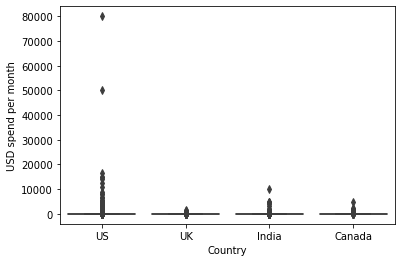

In [9]:
# 
four_countries = data_clean[data_clean["CountryLive"].str.contains("United States of America|India|Canada|United Kingdom")]

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = "spend_per_mo", x = "CountryLive", data = four_countries)
plt.ylabel("USD spend per month")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])

plt.show()